In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
from pandas import datetime

<ipython-input-18-7faee6df6c29>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [19]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')
type(dateparse)

function

In [20]:
time_1 = pd.read_csv("case_time_series.csv",
                   parse_dates=['Date_YMD'], index_col='Date_YMD',
                   date_parser=dateparse)
time_1.head()

<ipython-input-19-978fa4e7b097>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')


,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased
Date_YMD,,,,,,,
2020-01-30,30 January 2020,1,1,0,0,0,0
2020-01-31,31 January 2020,0,1,0,0,0,0
2020-02-01,1 February 2020,0,1,0,0,0,0
2020-02-02,2 February 2020,1,2,0,0,0,0
2020-02-03,3 February 2020,1,3,0,0,0,0


In [21]:
time_1.loc['2020-03-01']

Date               1 March 2020
Daily Confirmed               0
Total Confirmed               3
Daily Recovered               0
Total Recovered               3
Daily Deceased                0
Total Deceased                0
Name: 2020-03-01 00:00:00, dtype: object

In [22]:
time_1.iloc[92]

Date               1 May 2020
Daily Confirmed          2396
Total Confirmed         37262
Daily Recovered           962
Total Recovered         10021
Daily Deceased             77
Total Deceased           1231
Name: 2020-05-01 00:00:00, dtype: object

In [23]:
time=time_1.iloc[92:,:]

In [24]:
time.shape

(356, 7)

In [25]:
time.iloc[304]

Date               1 March 2021
Daily Confirmed           12270
Total Confirmed        11124248
Daily Recovered           12472
Total Recovered        10796873
Daily Deceased               92
Total Deceased           156695
Name: 2021-03-01 00:00:00, dtype: object

In [26]:
daily_Deceased_df=time["Daily Deceased"]

In [27]:
daily_Deceased_df.shape

(356,)

In [28]:
daily_Deceased_df[335]

468

In [29]:
daily_Deceased_df.describe()

count     356.000000
mean      513.839888
std       380.570683
min        75.000000
25%       176.000000
50%       444.000000
75%       777.250000
max      2101.000000
Name: Daily Deceased, dtype: float64

In [30]:
daily_Deceased_df.head()

Date_YMD
2020-05-01     77
2020-05-02     92
2020-05-03    140
2020-05-04    103
2020-05-05    128
Name: Daily Deceased, dtype: int64

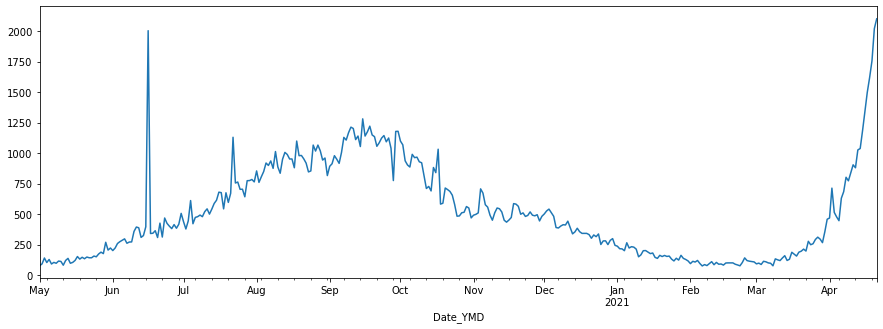

In [31]:
daily_Deceased_df.plot(kind="line",figsize=(15,5))
plt.show()

In [32]:
daily_Deceased_df.shape 

(356,)

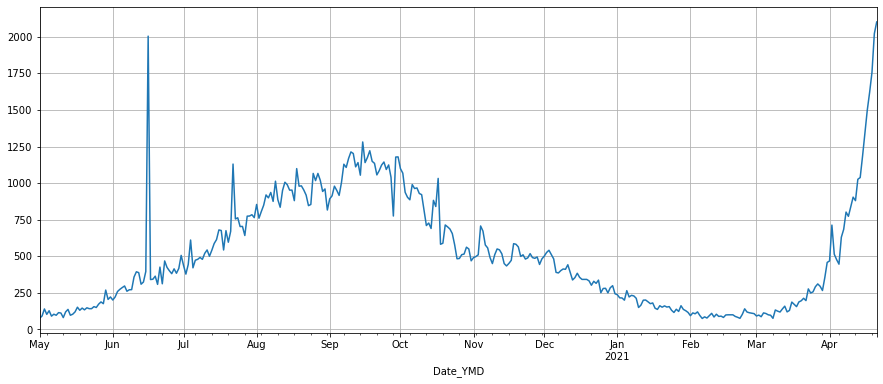

In [33]:
daily_Deceased_df.plot(grid=True) #Overall slight upward trend

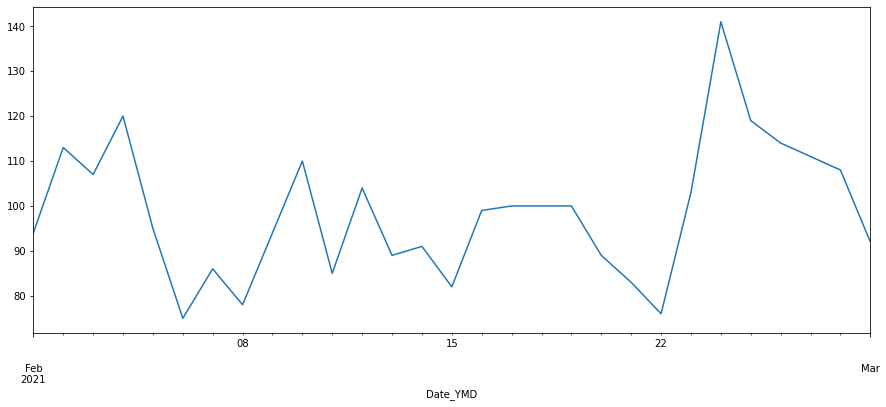

In [34]:
#analysing 2 months data
from datetime import datetime
start=datetime(2021,2,1)
end=datetime(2021,3,1)
daily_Deceased_df[(start<=daily_Deceased_df.index) & (daily_Deceased_df.index<=end)].plot()

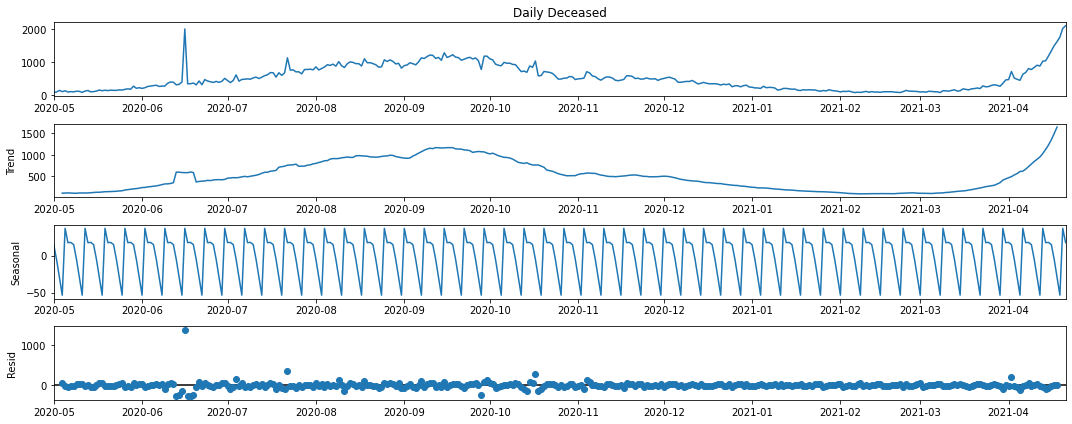

In [35]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_Deceased_df,model='additive')
fig=decomposition.plot()

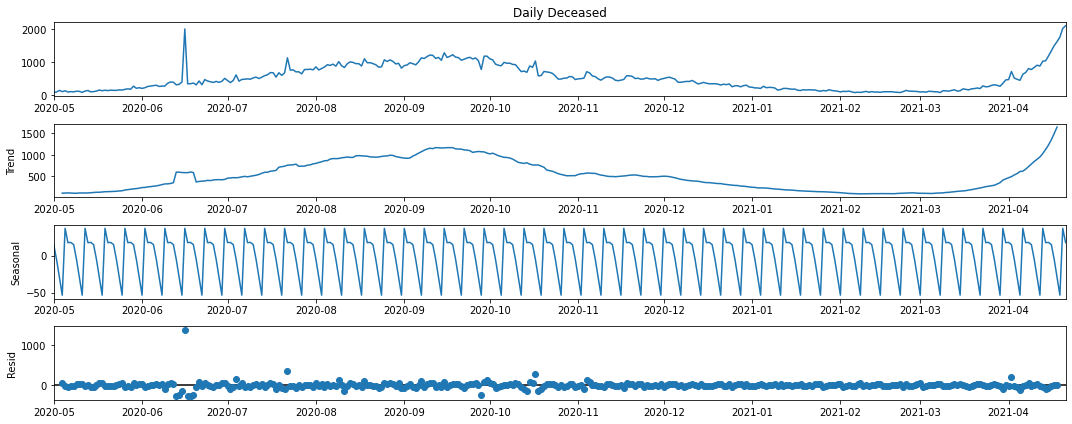

In [36]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(daily_Deceased_df,model='Multiplicative')
fig=decomposition.plot()

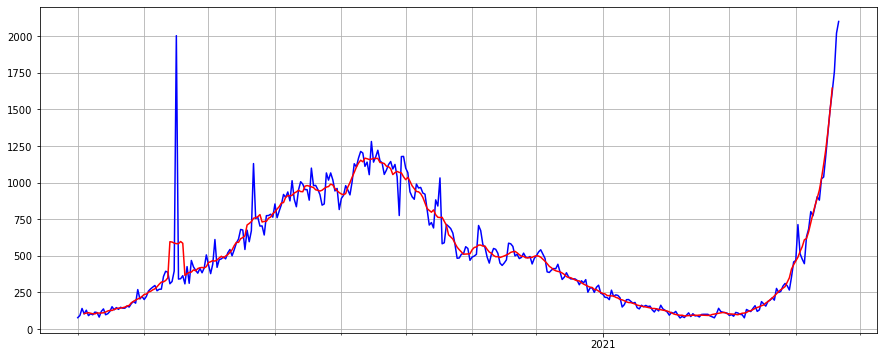

In [37]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator()
month = mdates.MonthLocator()
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(daily_confirmed_df.index, daily_confirmed_df, c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [38]:
daily_confirmed_df.shape

(356,)

In [39]:
train=daily_Deceased_df[20:336] 
test=daily_Deceased_df[336:]

In [40]:
train.tail()

Date_YMD
2021-03-28    295
2021-03-29    266
2021-03-30    355
2021-03-31    458
2021-04-01    468
Name: Daily Deceased, dtype: int64

In [41]:
test.tail()

Date_YMD
2021-04-17    1498
2021-04-18    1620
2021-04-19    1757
2021-04-20    2021
2021-04-21    2101
Name: Daily Deceased, dtype: int64

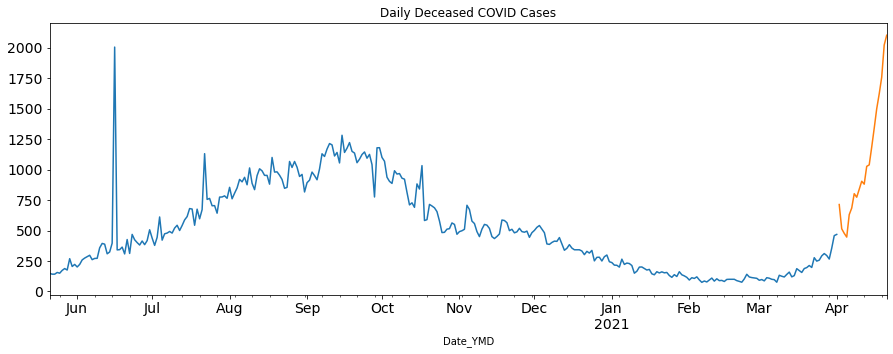

In [42]:
train.plot(figsize=(15,5), title= 'Daily Deceased COVID Cases', fontsize=14)
test.plot(figsize=(15,5), title= 'Daily Deceased COVID Cases', fontsize=14)
plt.show()

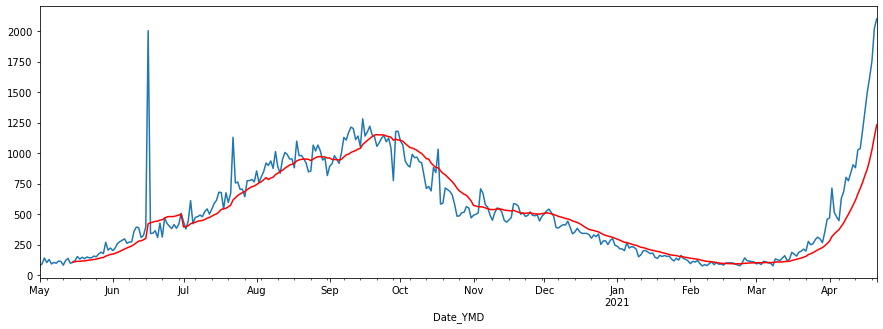

In [43]:

moving_avg =daily_Deceased_df.rolling(15).mean()
daily_Deceased_df.plot(kind="line",figsize=(15,5))
moving_avg.plot(kind="line",figsize=(15,5),color='red')
plt.show()

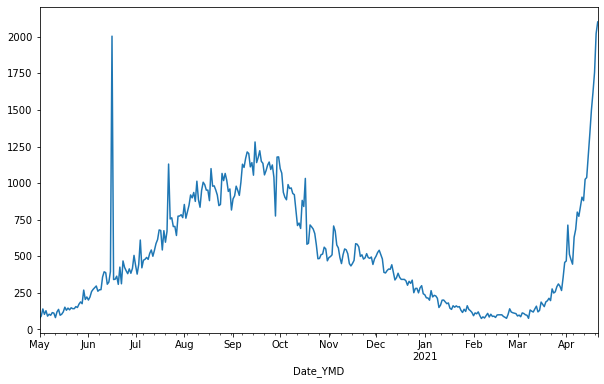

In [44]:
daily_Deceased_df.plot(kind="line",figsize=(10,6))

In [45]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [46]:
#SimpleExpSmoothing is used when data doesnt follow trend and seasonality
train= train.astype('double')
ses = SimpleExpSmoothing(train).fit()
ses1 = ses.forecast(62)
ses.summary()

C:\Users\sarat\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,SimpleExpSmoothing,SSE,4857000.200
Optimized:,True,AIC,3050.300
Trend:,None,BIC,3057.811
Seasonal:,None,AICC,3050.428
Seasonal Periods:,None,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,18:21:39
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2794653,alpha,True
initial_level,157.47150,l.0,True


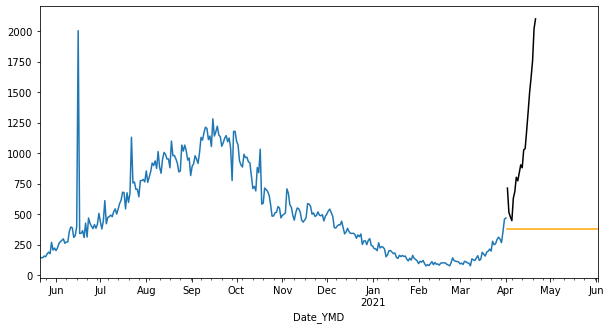

In [47]:
train.plot(kind="line",figsize=(10,5))
ses1.plot(kind="line",figsize=(10,5),color='orange')
test.plot(kind="line",figsize=(10,5),color='black')
plt.show()

In [73]:
hes = ExponentialSmoothing(train, trend='add').fit()
hes.summary()

C:\Users\sarat\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


Dep. Variable:,endog,No. Observations:,316
Model:,ExponentialSmoothing,SSE,4777003.203
Optimized:,True,AIC,3049.052
Trend:,Additive,BIC,3064.075
Seasonal:,None,AICC,3049.324
Seasonal Periods:,None,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,18:22:50
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2229163,alpha,True
smoothing_slope,0.0457555,beta,True


In [74]:
hes1 = hes.forecast(62)

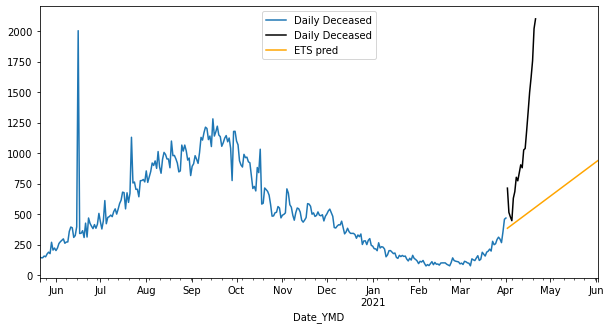

In [75]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hes1.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [100]:
hwes = ExponentialSmoothing(train, seasonal_periods=20,trend='mul', seasonal="Multiplicative").fit()
hwes.summary()

C:\Users\sarat\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\sarat\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


Dep. Variable:,endog,No. Observations:,316
Model:,ExponentialSmoothing,SSE,7018334.591
Optimized:,True,AIC,3210.621
Trend:,Multiplicative,BIC,3300.759
Seasonal:,Multiplicative,AICC,3215.479
Seasonal Periods:,20,Date:,"Sun, 25 Apr 2021"
Box-Cox:,False,Time:,18:27:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.1707029,alpha,True
smoothing_slope,0.1706914,beta,True


In [101]:
hwes = hwes.forecast(50)
print(hwes)

2021-04-02     489.290680
2021-04-03     436.099669
2021-04-04     508.024708
2021-04-05     696.246266
2021-04-06     630.195492
2021-04-07     584.685457
2021-04-08     664.001957
2021-04-09     685.221345
2021-04-10     716.536162
2021-04-11     735.445065
2021-04-12     841.311537
2021-04-13     873.325471
2021-04-14     878.120885
2021-04-15     949.460330
2021-04-16     989.275184
2021-04-17     971.730744
2021-04-18    1167.661411
2021-04-19    1332.122496
2021-04-20    1512.125161
2021-04-21    1568.055202
2021-04-22    1688.172141
2021-04-23    1504.650184
2021-04-24    1752.809106
2021-04-25    2402.219371
2021-04-26    2174.328096
2021-04-27    2017.307382
2021-04-28    2290.968644
2021-04-29    2364.180705
2021-04-30    2472.224460
2021-05-01    2537.464786
2021-05-02    2902.729925
2021-05-03    3013.185803
2021-05-04    3029.731151
2021-05-05    3275.869631
2021-05-06    3413.240584
2021-05-07    3352.707989
2021-05-08    4028.716559
2021-05-09    4596.147400
2021-05-10  

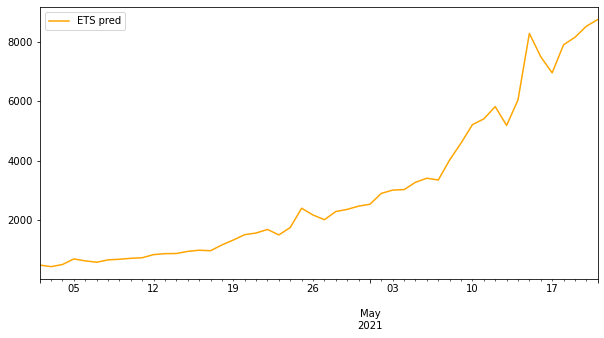

In [102]:
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

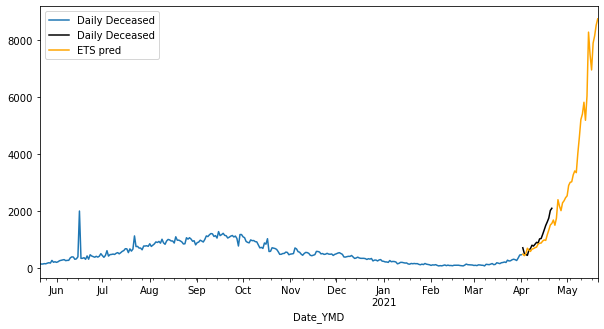

In [103]:
train.plot(kind="line",figsize=(10,5),legend=True)
test.plot(kind="line",figsize=(10,5),legend=True, color='black')
hwes.plot(kind="line",figsize=(10,5),color='orange',legend=True,label='ETS pred')

In [56]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  
    #Determing rolling statistics
    rolmean=pd.core.window.Rolling(timeseries, window=12).mean()
    rolstd = pd.core.window.Rolling(timeseries, window=12).std()



    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
# H0: series is nonstationary
# H1: series is stationary

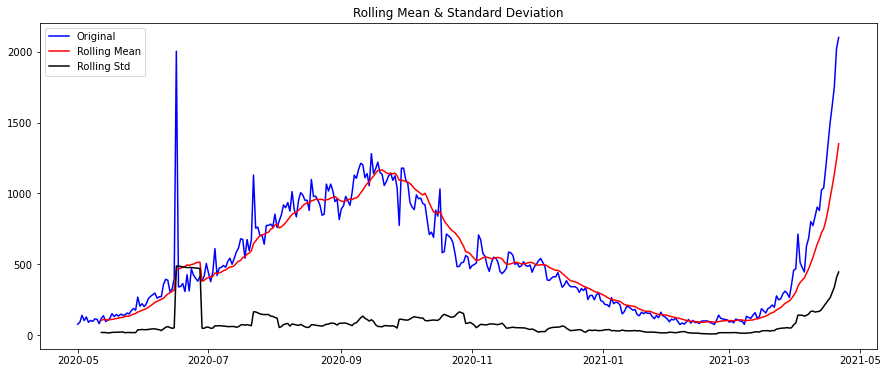

Results of Dickey-Fuller Test:
Test Statistic                  -0.491862
p-value                          0.893595
#Lags Used                      16.000000
Number of Observations Used    339.000000
Critical Value (1%)             -3.449788
Critical Value (5%)             -2.870104
Critical Value (10%)            -2.571332
dtype: float64


In [57]:
test_stationarity(daily_confirmed_df)

In [58]:
diff1=train.diff()
diff1=diff1.dropna()

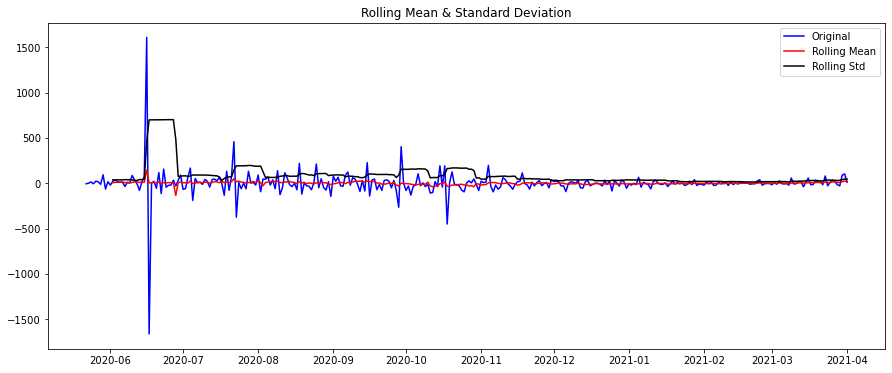

Results of Dickey-Fuller Test:
Test Statistic                -1.175956e+01
p-value                        1.156698e-21
#Lags Used                     5.000000e+00
Number of Observations Used    3.090000e+02
Critical Value (1%)           -3.451691e+00
Critical Value (5%)           -2.870939e+00
Critical Value (10%)          -2.571778e+00
dtype: float64


In [59]:
test_stationarity(diff1)

In [60]:
diff2=diff1.diff()
diff2=diff2.dropna()

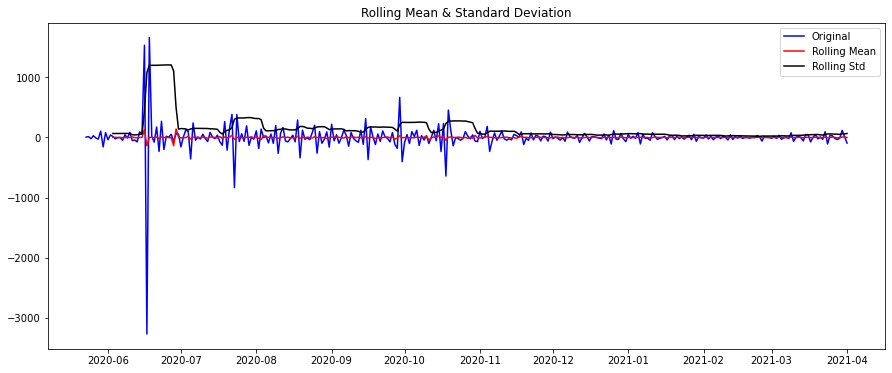

Results of Dickey-Fuller Test:
Test Statistic                -8.840239e+00
p-value                        1.676119e-14
#Lags Used                     1.600000e+01
Number of Observations Used    2.970000e+02
Critical Value (1%)           -3.452561e+00
Critical Value (5%)           -2.871321e+00
Critical Value (10%)          -2.571982e+00
dtype: float64


In [61]:
test_stationarity(diff2)

In [62]:
#Autocorelation and partial auto-corelation

In [63]:
from statsmodels.tsa.stattools import acf, pacf

C:\Users\sarat\Anaconda\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


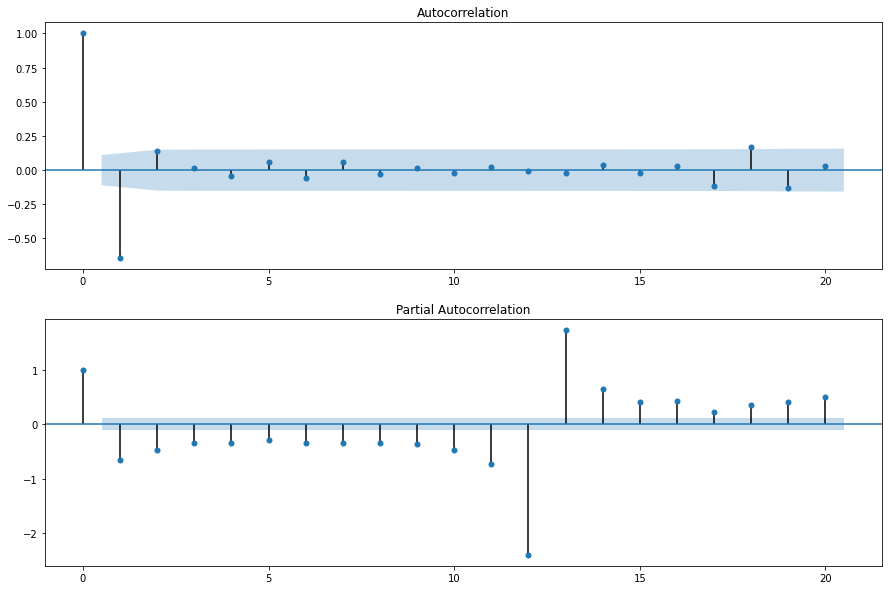

In [64]:
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(15,10))
pyplot.subplot(211)
plot_acf(diff2, ax=pyplot.gca(),lags=20)
pyplot.subplot(212)
plot_pacf(diff2, ax=pyplot.gca(),lags=20)
pyplot.show()

Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,2,0)[6]             : AIC=4783.046, Time=0.18 sec
 ARIMA(1,2,0)(1,2,0)[6]             : AIC=4451.336, Time=0.34 sec
 ARIMA(0,2,1)(0,2,1)[6]             : AIC=inf, Time=0.65 sec
 ARIMA(1,2,0)(0,2,0)[6]             : AIC=4603.524, Time=0.08 sec
 ARIMA(1,2,0)(2,2,0)[6]             : AIC=4328.723, Time=1.35 sec
 ARIMA(1,2,0)(2,2,1)[6]             : AIC=inf, Time=1.38 sec
 ARIMA(1,2,0)(1,2,1)[6]             : AIC=inf, Time=0.62 sec
 ARIMA(0,2,0)(2,2,0)[6]             : AIC=4488.466, Time=0.63 sec
 ARIMA(2,2,0)(2,2,0)[6]             : AIC=4254.672, Time=0.88 sec
 ARIMA(2,2,0)(1,2,0)[6]             : AIC=4369.087, Time=0.46 sec
 ARIMA(2,2,0)(2,2,1)[6]             : AIC=inf, Time=1.45 sec
 ARIMA(2,2,0)(1,2,1)[6]             : AIC=inf, Time=0.74 sec
 ARIMA(3,2,0)(2,2,0)[6]             : AIC=4217.334, Time=1.01 sec
 ARIMA(3,2,0)(1,2,0)[6]             : AIC=4323.089, Time=0.72 sec
 ARIMA(3,2,0)(2,2,1)[6]             : AIC=inf, Time=1.73 s

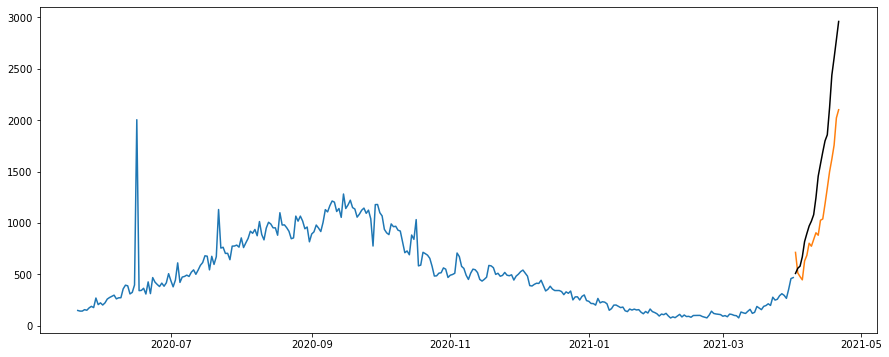

In [65]:
from pmdarima import auto_arima
model = auto_arima(train, start_p=0, start_q=0,
                           max_p=3, max_q=3, m=6,
                           start_P=0, start_Q=0, max_P=2, max_Q=2, seasonal=True,
                           d=2, D=2, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True
                          )
model.fit(train)

forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [66]:
print(model.summary()) 

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  316
Model:             SARIMAX(3, 2, 0)x(2, 2, 0, 6)   Log Likelihood               -2102.667
Date:                           Sun, 25 Apr 2021   AIC                           4217.334
Time:                                   18:22:04   BIC                           4239.597
Sample:                                        0   HQIC                          4226.242
                                           - 316                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1231      0.020    -55.899      0.000      -1.163      -1.084
ar.L2         -0.8230      0.044    -18.807

In [67]:
from statsmodels.tsa.arima_model import ARIMA

In [68]:
model = ARIMA(train, order=(2,2,0))
model_fit=model.fit(disp=True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:      D2.Daily Deceased   No. Observations:                  314
Model:                 ARIMA(2, 2, 0)   Log Likelihood               -2065.137
Method:                       css-mle   S.D. of innovations            173.522
Date:                Sun, 25 Apr 2021   AIC                           4138.274
Time:                        18:22:04   BIC                           4153.271
Sample:                    05-23-2020   HQIC                          4144.267
                         - 04-01-2021                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1969      4.076      0.048      0.961      -7.792       8.186
ar.L1.D2.Daily Deceased    -0.9423      0.050    -18.944      0.000      -1.040      -0.845


C:\Users\sarat\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
C:\Users\sarat\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


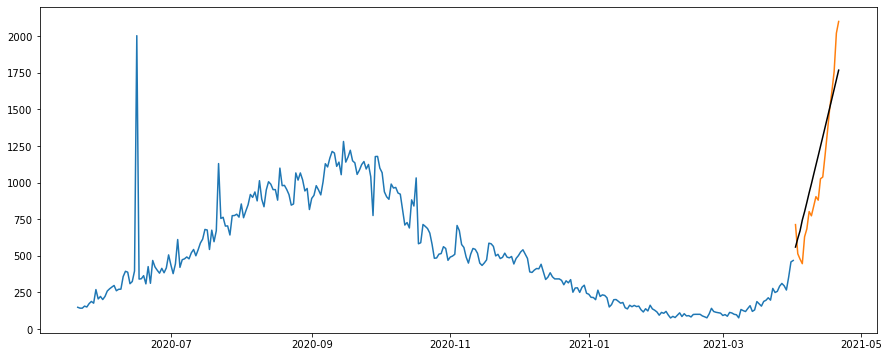

In [69]:
forecast = model_fit.forecast(steps=20)[0]

forecast = pd.DataFrame(forecast,index = test.index,columns=['Prediction'])

#plot the predictions for validation set
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction', color='black')
plt.show()

In [70]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [71]:
print(mean_absolute_error(y_true=test,y_pred=forecast))

190.16574458189024


In [72]:
#ARIMA model gave best results.